In [235]:
import networkx as nx
import random as rd
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}


#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
#ESTA FUNCION NO SE USA
'''
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes
     

'''
#Funcion para conectar los nodos
def connect_nodes(G,n,k,p):
    nodes_senders = []
    nodes_receivers = []
    while len(nodes_receivers)<= (round(n*k*p)-1):
        for node in G:
            #if rd.random() < p:
            for connection in range(1,k+1):
                receiver_node = rd.randint(0,n-1)
                if  receiver_node != node and not G.has_edge(receiver_node, node):
                    G.remove_edge(node, ((node+connection)%n))
                    G.add_edge(node,receiver_node)
                    nodes_senders.append(node)
                    nodes_receivers.append(receiver_node)                           
    print("Los nodos que envian la conexion son", nodes_senders)
    print("Los nodos que reciben la conexion son", nodes_receivers)               
    return G,nodes_senders,nodes_receivers
    

#Funcion para obtener los vecinos de los nodos
def get_neighbors(G, node):
    neighbors = []
    #for node in nodes:
    for node_G in G:
            if G.has_edge(node,node_G):
                neighbors.append(node_G)
    return neighbors


#Inicia una red conectando cada nodo a sus 2k vecinos
def create_regular_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones de largo alcance a recablear son:",round(n*k*p))
    return G


def new_conn_S(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_senders)):
        neighbors = get_neighbors(G, nodes_receivers[i])
        G.add_edge(nodes_senders[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


def new_conn_R(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_receivers)):
        neighbors = get_neighbors(G, nodes_senders[i])
        G.add_edge(nodes_receivers[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


#Matriz de acoplamiento

def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 






El numero de conexiones de largo alcance a recablear son: 300
Los nodos que envian la conexion son [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 65, 65, 65, 66, 66, 66, 67, 67, 67, 68, 68, 69, 69, 69, 70, 70, 70, 71, 71, 71, 72, 72, 72, 73, 73, 73, 74, 74, 74, 75, 75, 75, 76, 76, 76, 77, 77, 77, 78, 78, 78, 79

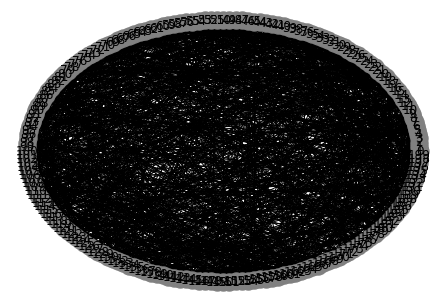

In [244]:
n,k,p  = 200,3,0.5
G = create_regular_network(n,k,p)
G,nodes_senders,nodes_receivers = connect_nodes(G, n,k,p)
#if len(nodes_receivers) != round(n*k*p):
 #   raise Exception("No se generaron las nkp conexiones requeridas, considere simular nuevamente")
G = new_conn_S(G,nodes_senders,nodes_receivers)
G = new_conn_R(G,nodes_senders,nodes_receivers)
ma = matriz_acoplaminento(G)
#ma = -nx.laplacian_matrix(G).toarray()
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)

print("El coeficiente de agrupamiento es:",nx.algorithms.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))
nx.draw_circular(G,**opts)

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valos propio Lamda2 es:")
print(vp[1])

print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)